# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_metadata = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_metadata.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
number_mice = mouse_metadata["Mouse ID"].unique()
len(number_mice)

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated = mouse_metadata.groupby(["Mouse ID", "Timepoint"])
duplicated_df = duplicated.count()
duplicated_df = duplicated_df.reset_index()
duplicated_df = duplicated_df.set_index("Mouse ID")
duplicated_sorted = duplicated_df.loc[duplicated_df["Sex"] > 1]
duplicated_sorted.head()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
g989,0,2,2,2,2,2,2
g989,5,2,2,2,2,2,2
g989,10,2,2,2,2,2,2
g989,15,2,2,2,2,2,2
g989,20,2,2,2,2,2,2


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
g989 = mouse_metadata.loc[mouse_metadata["Mouse ID"] == "g989"]
g989

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = mouse_metadata.drop(mouse_metadata[mouse_metadata["Mouse ID"] == "g989"].index)
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
new_number_mice = clean_data["Mouse ID"].unique()
len(new_number_mice)

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

clean_data.head()
regimen = clean_data.groupby("Drug Regimen")

# Calculating mean
mean = regimen["Tumor Volume (mm3)"].mean()
mean

# Calculating median
median = regimen["Tumor Volume (mm3)"].median()
median

# Calculating variance
variance = regimen["Tumor Volume (mm3)"].var()
variance

# Calculating standard deviation
std_dev = regimen["Tumor Volume (mm3)"].std()
std_dev

# Calculating SEM
sem = regimen["Tumor Volume (mm3)"].sem()
sem

# Creating a dictionary 
dictionary = {"Mean Tumor Volume": mean, "Median Tumor Volume": median,
              "Tumor Volume Variance": variance, "Tumor Volume Std. Dev.": std_dev,
              "Tumor Volume Std. Err.": sem}

# Creating DataFrame
summary_statistics = pd.DataFrame(dictionary)
summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

Text(0, 0.5, '# of Obsrved Mouse Timepoints')

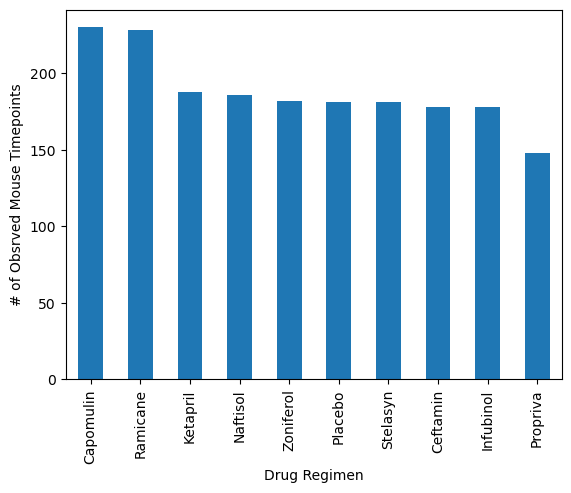

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen = clean_data.groupby("Drug Regimen")
bar_chart1 = regimen["Mouse ID"].count()
bar_chart1_df = pd.DataFrame(bar_chart1)
bar_chart = bar_chart1_df.sort_values(by="Mouse ID", ascending=False)
bar_chart.plot(kind="bar", legend=False)
plt.xticks(rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Obsrved Mouse Timepoints")

Text(0, 0.5, '# of Obsrved Mouse Timepoints')

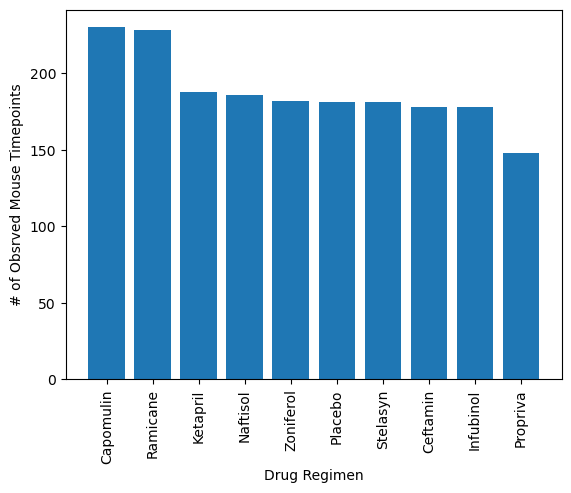

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen = clean_data.groupby("Drug Regimen")
bar_chart1 = regimen["Mouse ID"].count()
bar_chart = bar_chart1.sort_values(ascending=False)
x_axis = bar_chart.index
y_axis = bar_chart.values
plt.bar(x_axis, y_axis,)
plt.xticks(rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Obsrved Mouse Timepoints")

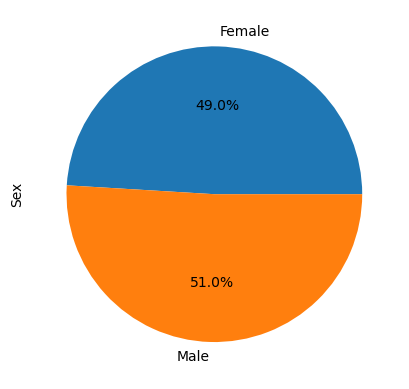

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
group = clean_data.groupby("Sex")
sex = group["Mouse ID"].count()
sex_df = pd.DataFrame(sex)
sex_df.plot(kind="pie", subplots=True, autopct="%1.1f%%", legend=False)
plt.ylabel("Sex")
plt.show()

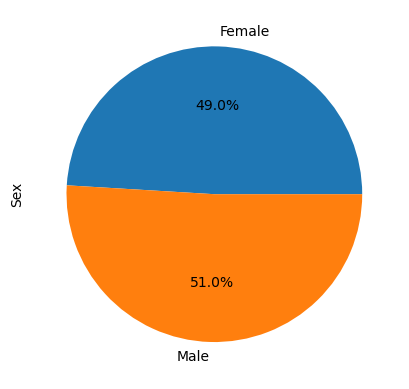

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
group = clean_data.groupby("Sex")
sex = group["Mouse ID"].count()
sizes = sex.values
labels = sex.index
plt.pie(sizes, labels=labels,autopct="%1.1f%%", startangle=0)
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
filter1 = clean_data.loc[((clean_data["Drug Regimen"] == "Capomulin") |
                             (clean_data["Drug Regimen"] == "Ramicane") |
                             (clean_data["Drug Regimen"] == "Infubinol") |
                             (clean_data["Drug Regimen"] == "Ceftamin"))]
b= clean_data.groupby(["Mouse ID"])
a = b.max("Timepoint")
c = a.loc[:,["Timepoint"]]
final_tumor = pd.merge(c,filter1, on=["Mouse ID", "Timepoint"])
final_tumor_vol = final_tumor.iloc[:,[0, 4, 2]]
final_tumor_vol.head(10)


,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,a203,Infubinol,67.973419
1,a251,Infubinol,65.525743
2,a275,Ceftamin,62.999356
3,a411,Ramicane,38.407618
4,a444,Ramicane,43.047543
5,a520,Ramicane,38.810366
6,a577,Infubinol,57.031862
7,a644,Ramicane,32.978522
8,a685,Infubinol,66.083066
9,b128,Capomulin,38.982878


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
list_values = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for values in treatment:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    regimen = final_tumor_vol.loc[final_tumor_vol["Drug Regimen"] == values, "Tumor Volume (mm3)"]
    
    # add subset 
    list_values.append(regimen)
    
    # Determine outliers using upper and lower bounds
    quartiles = regimen.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = regimen.loc[(regimen < lower_bound) | (regimen > upper_bound)]
    print(f"{values} potencial outliers: {outliers}.")

Capomulin potencial outliers: Series([], Name: Tumor Volume (mm3), dtype: float64).
Ramicane potencial outliers: Series([], Name: Tumor Volume (mm3), dtype: float64).
Infubinol potencial outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64.
Ceftamin potencial outliers: Series([], Name: Tumor Volume (mm3), dtype: float64).


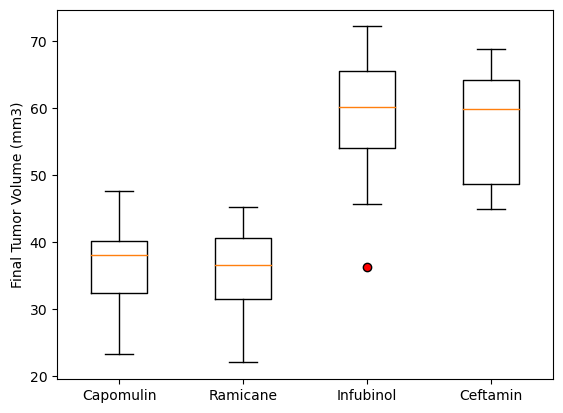

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
data = list_values
plt.boxplot(data, flierprops = dict(markerfacecolor = "red"))
plt.xticks([1, 2, 3, 4], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

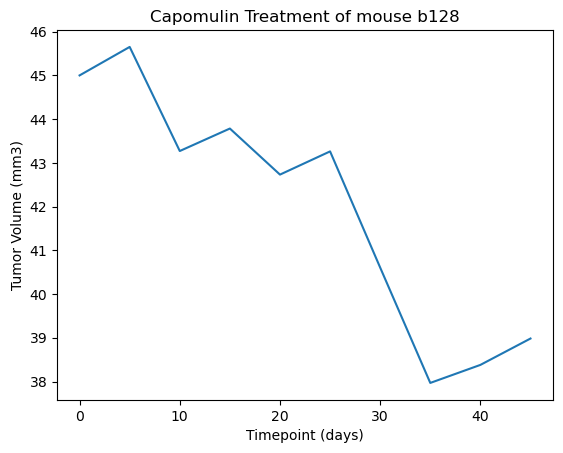

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
b128 = clean_data.loc[(clean_data["Mouse ID"] == "b128") &
                     (clean_data["Drug Regimen"] == "Capomulin")]
x_axis = b128["Timepoint"]
y_axis = b128["Tumor Volume (mm3)"]
plt.plot(x_axis, y_axis)
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint (days)')
plt.title('Capomulin Treatment of mouse b128')
plt.show()

C:\Users\oscar\AppData\Local\Temp\ipykernel_7064\2808463498.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_group = grouping.mean()


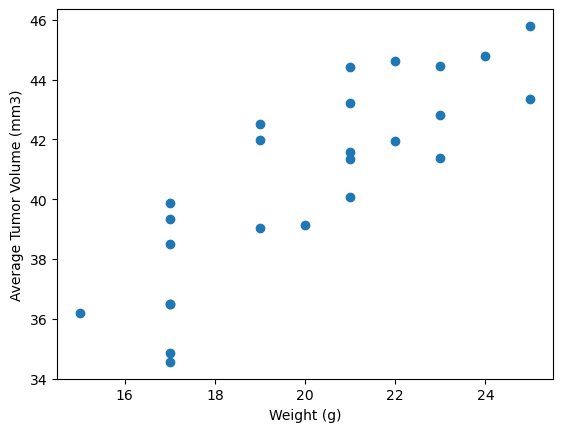

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
weight_tumor_vol = clean_data.loc[(clean_data["Drug Regimen"] == "Capomulin")]
grouping = weight_tumor_vol.groupby("Mouse ID")
average_group = grouping.mean()

x_axis = average_group["Weight (g)"]
y_axis = average_group["Tumor Volume (mm3)"]
plt.scatter(x_axis, y_axis)
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Weight (g)')
plt.show()


## Correlation and Regression

The correlation between both factors is 0.84


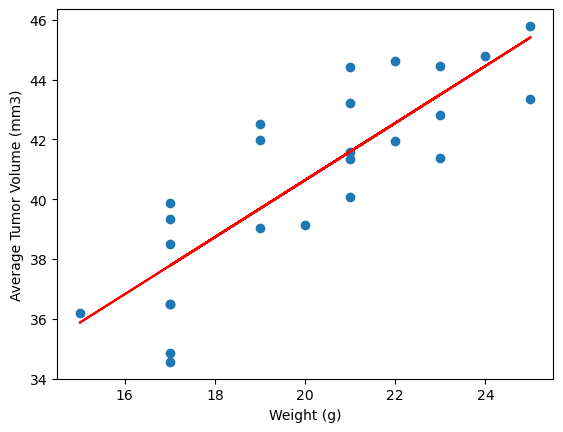

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(x_axis,y_axis)
print(f"The correlation between both factors is {round(correlation[0],2)}")

x_values = average_group["Weight (g)"]
y_values = average_group["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Weight (g)')
plt.show()